# CNN for acoustic scene classfication: my life environment

Date: March 5, 2019

Neural network: input MFSCs to CNN

## Preparing data set for CNN

In [2]:
DATASET_FOLDER = '../dataset/data_environment'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=False)
shape = ds.shape
class_labels = ds.class_labels

((980, 64, 40, 1), (420, 64, 40, 1))

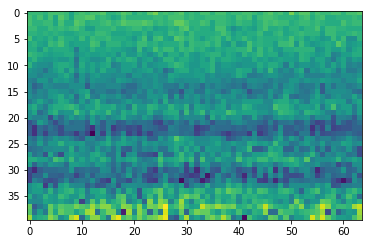

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)))
train_data.shape, test_data.shape

### CNN model

In [4]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 6, 32)         4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

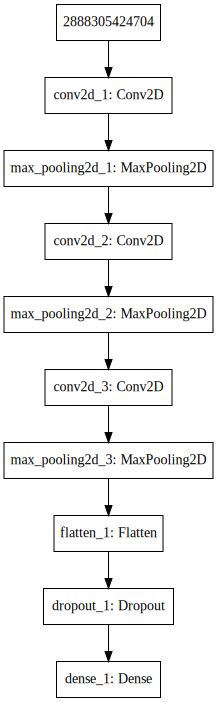

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [7]:
EPOCHS = 10
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 980 samples, validate on 420 samples
Epoch 1/10
980/980 [==============================] - 34s 35ms/step - loss: 1.7855 - acc: 0.3000 - val_loss: 1.4807 - val_acc: 0.5238
Epoch 2/10
980/980 [==============================] - 33s 33ms/step - loss: 1.3566 - acc: 0.5061 - val_loss: 1.2268 - val_acc: 0.5738
Epoch 3/10
980/980 [==============================] - 32s 33ms/step - loss: 1.1662 - acc: 0.5867 - val_loss: 1.0960 - val_acc: 0.6167
Epoch 4/10
980/980 [==============================] - 31s 32ms/step - loss: 1.0416 - acc: 0.6357 - val_loss: 1.0108 - val_acc: 0.6476
Epoch 5/10
980/980 [==============================] - 31s 32ms/step - loss: 0.9267 - acc: 0.6745 - val_loss: 0.9266 - val_acc: 0.6690
Epoch 6/10
980/980 [==============================] - 32s 32ms/step - loss: 0.8317 - acc: 0.7214 - val_loss: 0.8169 - val_acc: 0.7333
Epoch 7/10
980/980 [==============================] - 32s 32ms/step - loss: 0.7069 - acc: 0.7694 - val_loss: 0.7445 - val_acc: 0.7476
Epoch 8/10
980/9

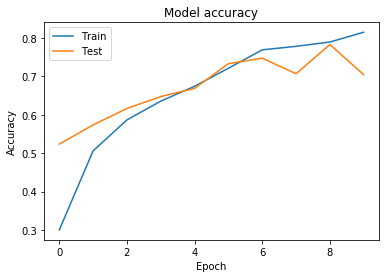

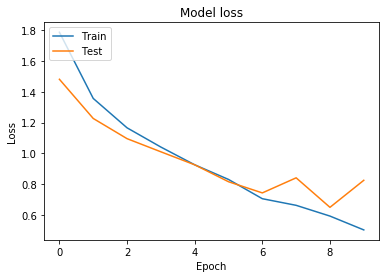

In [20]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [21]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_for_aed_environment{}.h5'.format(dt)
model.save(filename)

## Load the model

In [22]:
del model
model = models.load_model(filename)

## Confirmation

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [25]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [26]:
class_labels

['train', 'station', 'fastfood', 'escalator', 'mall', 'street', 'port']

In [27]:
(activations[-1][:10]*100).astype(int)

array([[ 0,  0,  0,  0,  0,  0, 99],
       [ 0,  0,  0, 23,  0, 74,  1],
       [95,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 91,  0,  2,  2,  3],
       [ 0,  0,  0,  0,  0,  0, 99],
       [ 0,  0,  1,  1, 93,  2,  0],
       [95,  0,  0,  0,  0,  3,  0],
       [ 7,  0, 20, 15,  0, 42, 13],
       [ 0,  0,  6, 46, 19, 23,  3],
       [ 0,  0,  0,  0, 99,  0,  0]])

In [28]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0]])

In [42]:
%run ./plot_layer.py

'station'

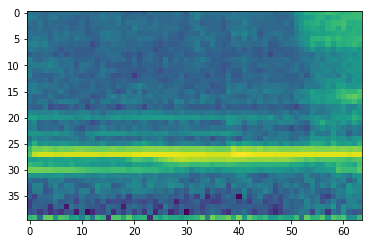

In [57]:
image_number = 32

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

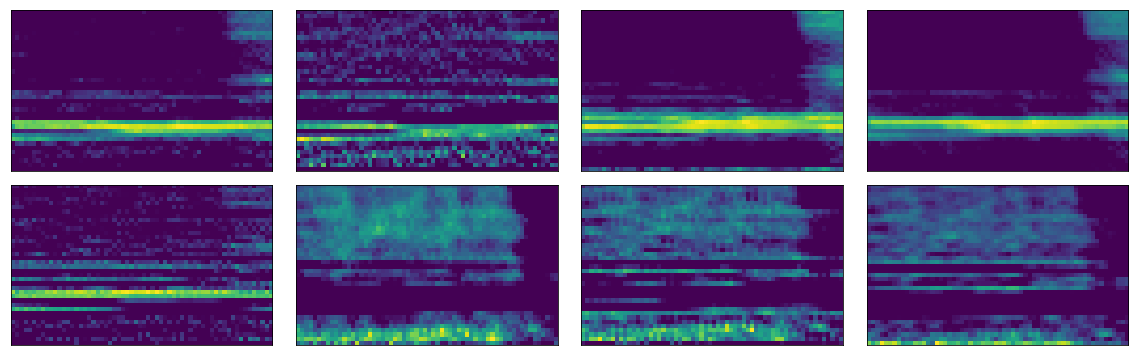

In [58]:
plot_layer(activations, image_number, 0, 4)

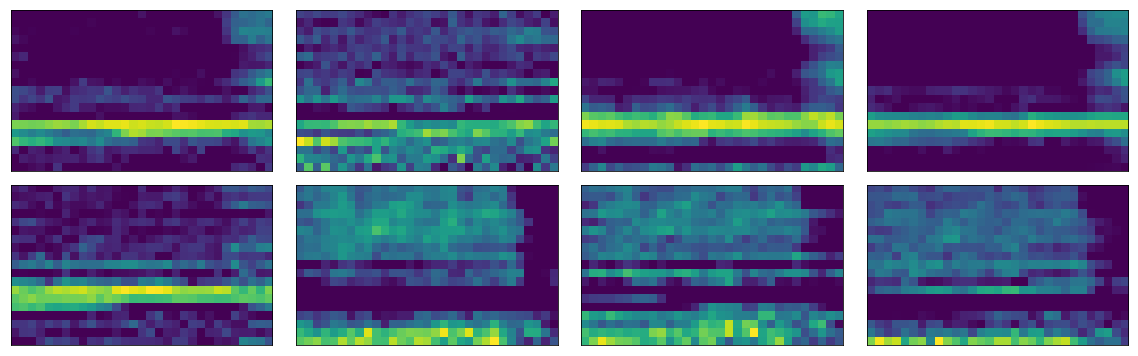

In [59]:
plot_layer(activations, image_number, 1, 4)

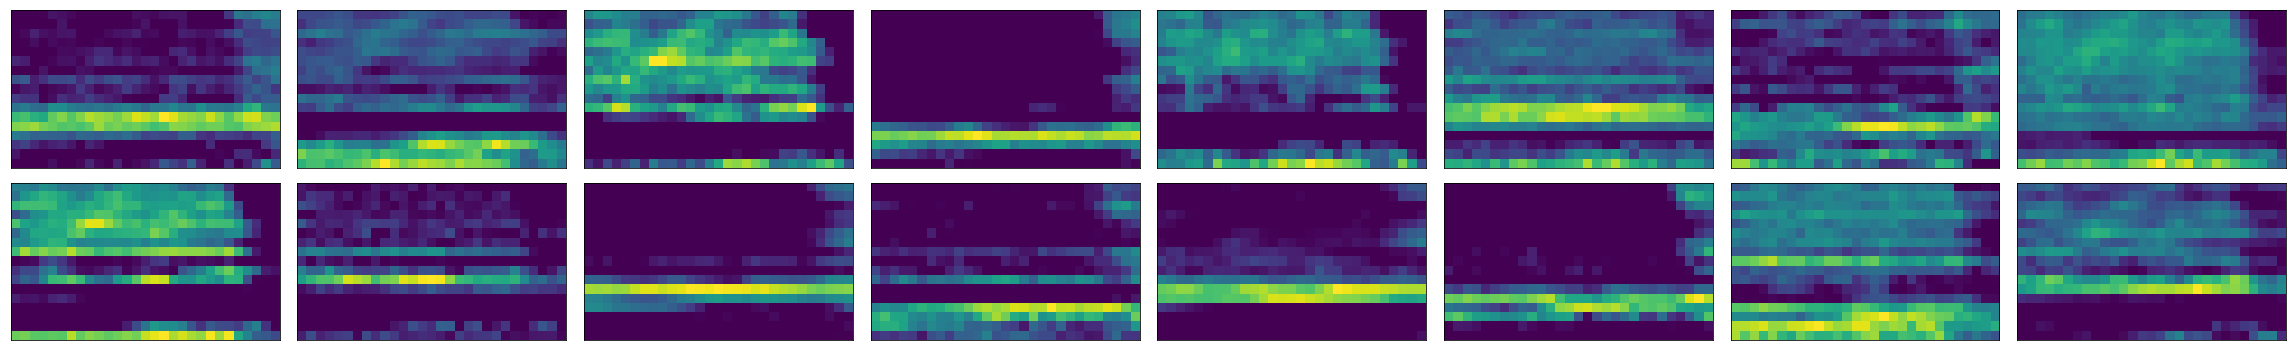

In [60]:
plot_layer(activations, image_number, 2, 8)

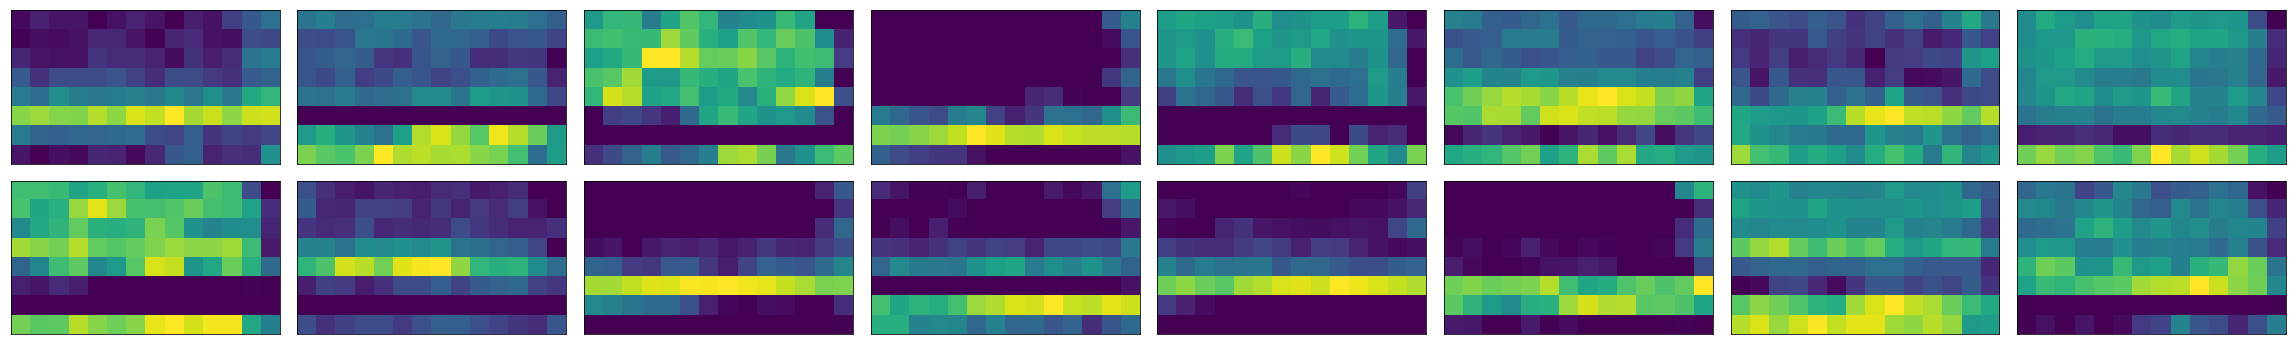

In [61]:
plot_layer(activations, image_number, 3, 8)

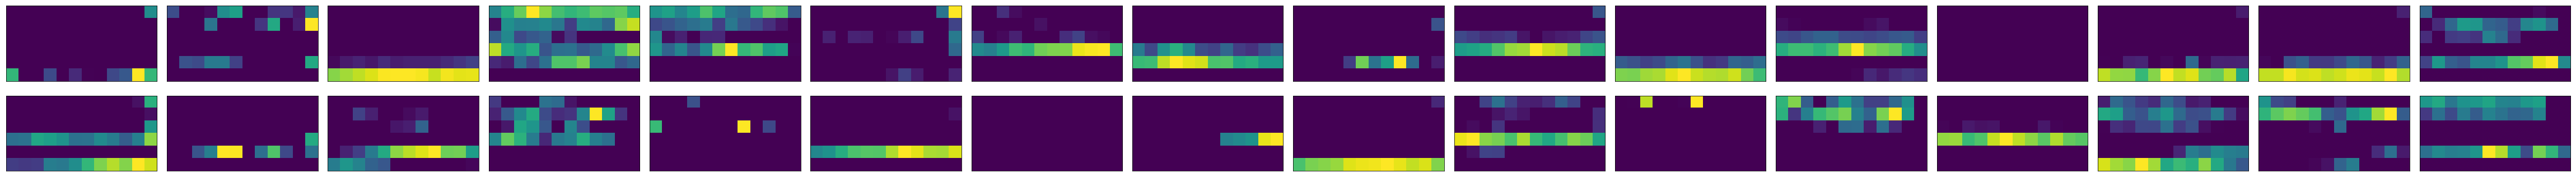

In [62]:
plot_layer(activations, image_number, 4, 16)

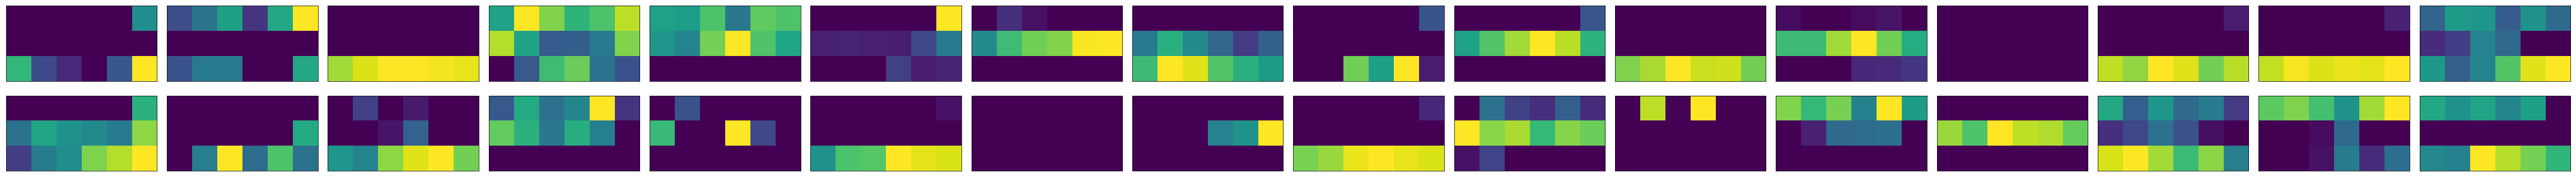

In [63]:
plot_layer(activations, image_number, 5, 16)